In this Notebook you guys will implement linear regression using NumPy

We have provided hints along the way in the comments

Some cells we have commented "#DO NOT EDIT" please do not edit these cells as they will be used for evaluating your assignment


Any extra cells used must be commented to explain what is being done

BEST OF LUCK !!


*NOTE:The target variable is Target*


In [35]:
#Importing neccessary libraries
#do not import anything else

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale


In [36]:
#import the dataset
data=pd.read_csv("lin_dat.csv")

In [37]:
data.head()

,LogL,LogH,LogW,Target
0,1.477121,1.061452,0.604226,2.383815
1,1.494155,1.096215,0.634034,2.462398
2,1.492760,1.092643,0.671737,2.531479
3,1.525045,1.104828,0.648896,2.559907
4,1.531479,1.094960,0.710456,2.633468


In [38]:
#Separate features and target variables
Y=data["Target"]
X=data.loc[:,data.columns!="Target"]

In [39]:
#Extra preproccesing if required
#hint: you may need to use .to_numpy and reshape functions
Y=Y.to_numpy()
X=X.to_numpy()
Y=Y.reshape(Y.shape[0],1)
print(Y.shape)

(158, 1)


In [40]:
#Split train and test dataset use test size=0.2 and random_state=1
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.2, random_state=1)

In [41]:
#Other preprocessing if required(transpose a matrix maybe?
X_train_un=X_train.T
Y_train=Y_train.T


print(X_train.shape,Y_train.shape)

(126, 3) (1, 126)


Below is an image to refresh you memory regarding linear regression
Your task is to implement the vectorised versions of these
You can refer the log regression notebook for help
here m is the number of examples and h(theta) is y_hat

![Here's an image to refresh your memory ](Refresher.jpg "Refresh")

In [42]:
#initialize weights
#should return numpy array of weights and constant c
def weight_init(X):
    weights=np.zeros((X.shape[0],1))
    const=0
    return weights,const
    

In [43]:
#Calculate Hypothesis
def hypothesis(X,W,c):
    
    Z=np.dot(W.T,X)+c
    
    
    return Z

In [44]:
#Calculate Cost
#hint: use np.square
def Cost(y,y_hat):
    m=y.shape[1] #number of example
    J=(1/(2*m))*(np.sum(np.square((y-y_hat))))
    return J

In [45]:
#Perform gradient descent
def gradient_descent(w,c,x,y,y_hat,alpha):
    m=y.shape[1]
    
    
    dW=(1/m)*(np.dot(x,(y_hat-y).T))
    dc=(1/m)*np.sum((y_hat-y).T)
   
    w-=alpha*(dW)
    c-=alpha*(dc)
    return c

In [46]:
#Assemble Your linear regression model 
#make it print cost after 25%,50%,75%,100% of the iterations are complete 
#also add an option to disable cost output and directly print cost after last iteration 
#hint use verbose as extra arguement of function
#costs is array of all costs
def lin_model_fit(X,Y,iterations,alpha,verbose=1):
    w,c=weight_init(X) #initialising weights
    costs=[] #list of costs to help plot graph later
    for i in range(iterations):
        y_hat=hypothesis(X,w,c)
        
        costs.append(Cost(Y,y_hat))
        c=gradient_descent(w,c,X,Y,y_hat,alpha)
        if i%25==0 and verbose:
            print("iteration no: ",i," and cost:",costs[-1])
    print("iteration no: ",iterations," and cost:",costs[-1])
    return w,c,costs
    


In [47]:
#Fit model to data
# use alpha=0.01,iter=100
W,c,cost=lin_model_fit(X_train_un,Y_train,100,0.01)


iteration no:  0  and cost: 2.873470602278725
iteration no:  25  and cost: 0.3416034605929013
iteration no:  50  and cost: 0.06647552837694762
iteration no:  75  and cost: 0.036057350982268484
iteration no:  100  and cost: 0.032248382306024725


In [48]:
#Fit model to normalised data using minmaxscaler
#use alpha=0.01,iter=100
X_train_normalized = minmax_scale(X_train).T
X_test_normalized=minmax_scale(X_test).T
Wn,cn,costn=lin_model_fit(X_train_normalized,Y_train,100,0.01)


iteration no:  0  and cost: 2.873470602278725
iteration no:  25  and cost: 0.9305551851838164
iteration no:  50  and cost: 0.3056934918498514
iteration no:  75  and cost: 0.10463395754043125
iteration no:  100  and cost: 0.041274485595829705


iteration no:  100  and cost: 0.032248382306024725
iteration no:  100  and cost: 0.041274485595829705


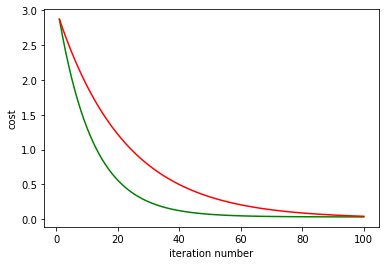

In [49]:
#draw combined graph of above models of cost V/s iterations
constants=[]
weights=np.zeros((3,2))
costs=np.zeros((2,100))

weight,constant,cost=lin_model_fit(X_train_un,Y_train,100,0.01,verbose=0)
weights[:,0]=weight[:,0]
constants.append(constant)
costs[0,:]=cost
weight,constant,cost=lin_model_fit(X_train_normalized,Y_train,100,0.01,verbose=0)
weights[:,1]=weight[:,0]
constants.append(constant)
costs[1,:]=cost
itr=range(1,100+1)
colors=['green','red']

for i in range(len(colors)):
    costed=costs[i,:]
    plt.plot(itr,costed,color=colors[i])

plt.ylabel("cost")
plt.xlabel('iteration number')
plt.show()

In [50]:
#store best value of weights in weights_final
weights_final=W

In [51]:
#write function to use model on data for prediction
def predict(X,w,c):
    #your code here
    pred=hypothesis(X,w,c)
    
    return pred

In [53]:
#Calculate accuracy 

def accuracy(y,y_hat):
    return 100 - (np.mean(np.abs(y_hat - y)) * 100)

In [54]:
X_test=X_test.T
Y_test=Y_test.T
X_train=X_train.T
#used for transpose as it is required for below mentioned syntax

In [55]:
#call predict function to make predictions on test and train data
#DO NOT EDIT
pred_train=predict(X_train,weights_final,c)
pred_test=predict(X_test,weights_final,c)


In [56]:
#DO NOT EDIT
print("=============For train data:=============")
acc1=accuracy(Y_train,pred_train)
print("accuracy:",acc1)
print("\n\n=============For test data================")
acc2=accuracy(Y_test,pred_test)
print("accuracy:",acc2)

=============For train data:=============
accuracy: 80.68362401555582


=============For test data================
accuracy: 79.68194047014903


The below cells plot y_hat vs y
The closer the plot is to a straight line;The better your model

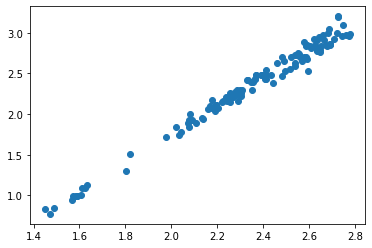

In [57]:
plt.scatter(pred_train,Y_train)
plt.show()

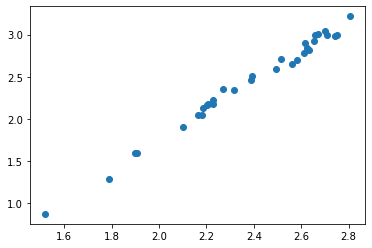

In [58]:
plt.scatter(pred_test,Y_test)
plt.show()

The Below questions are optional and can be done for brownie points



--------------------------------ALPHA= 0.099 ------------------------


iteration no:  100  and cost: 0.016502804553403784


--------------------------------ALPHA= 0.08 ------------------------


iteration no:  100  and cost: 0.018811105709567167


--------------------------------ALPHA= 0.01 ------------------------


iteration no:  100  and cost: 0.032248382306024725


--------------------------------ALPHA= 0.02 ------------------------


iteration no:  100  and cost: 0.02940887550985115


--------------------------------ALPHA= 0.001 ------------------------


iteration no:  100  and cost: 1.2326764709855662


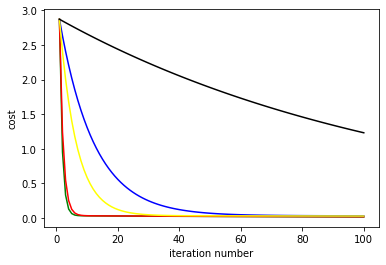

In [76]:
#Try out hyperparameter tuning for alpha

alpha=[0.099,0.08,0.01,0.02,0.001]
costs=np.zeros((len(alpha),100))
weights=np.zeros((3,len(alpha)))
constants=[]
for x in range(len(alpha)):
    print("\n\n--------------------------------ALPHA=",alpha[x],"------------------------\n\n")
    weight,constant,cost=lin_model_fit(X_train_un,Y_train,100,alpha[x],verbose=0)
    weights[:,x]=weight[:,0]
    constants.append(constant)
    costs[x,:]=cost
itr=range(1,100+1)
colors=['green','red','blue','yellow','black']

for i in range(len(colors)):
    costed=costs[i,:]
    plt.plot(itr,costed,color=colors[i])

plt.ylabel("cost")
plt.xlabel('iteration number')
plt.show()   


In [77]:
#Print your best accuracy acheived and hyperparameter value
weight,constant,cost=lin_model_fit(X_train_normalized,Y_train,100,0.099,verbose=0)
pred_train=predict(X_train_normalized,weight,constant)
pred_test=predict(X_test_normalized,weight,constant)
#DO NOT EDIT
print("=============For train data:=============")
acc1=accuracy(Y_train,pred_train)
print("accuracy:",acc1)
print("\n\n=============For test data================")
acc2=accuracy(Y_test,pred_test)
print("accuracy:",acc2)

iteration no:  100  and cost: 0.004709696881806804
=============For train data:=============
accuracy: 92.59110194298695


=============For test data================
accuracy: 91.56862932132641
